In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn-darkgrid')

In [2]:
X,y = make_blobs(n_samples=1500,centers=3,random_state=170)

In [3]:
# 変換行列の適用
transformation = [[0.5,-0.6],[-0.3,0.8]]
X_aniso = np.dot(X,transformation)

In [4]:
X_aniso

array([[-2.7916172 ,  3.63236314],
       [-3.00173582,  3.78627892],
       [-3.15639237,  0.46412084],
       ...,
       [ 0.95277383, -1.54262502],
       [-0.39074304,  0.78227797],
       [ 0.9424627 , -1.13033403]])

In [5]:
X

array([[-5.19811282e+00,  6.41869316e-01],
       [-5.75229538e+00,  4.18627111e-01],
       [-1.08448984e+01, -7.55352273e+00],
       ...,
       [ 1.36105255e+00, -9.07491863e-01],
       [-3.54141108e-01,  7.12241630e-01],
       [ 1.88577252e+00,  1.41185693e-03]])

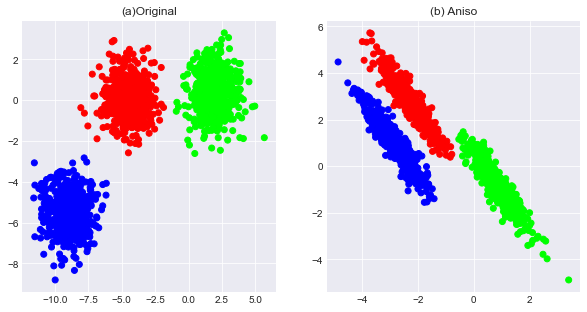

In [8]:
# 可視化
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.title('(a)Original')
plt.scatter(X[:,0],X[:,1],c=y,cmap='brg')
plt.subplot(122)
plt.title('(b) Aniso')
plt.scatter(X_aniso[:,0],X_aniso[:,1],c=y,cmap='brg')
plt.show()

# ガウス混合モデルの適用

In [9]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [11]:
# 標準化
X_norm = StandardScaler().fit_transform(X_aniso)

In [12]:
# k-means
kmeans = KMeans(n_clusters=3,random_state=5)
kmeans.fit(X_norm)
kmeans_y_pred = kmeans.predict(X_norm)

In [13]:
# ガウス混合モデル
gmm = GaussianMixture(n_components=3,random_state=5)
gmm.fit(X_norm)
gmm_y_pred = gmm.predict(X_norm)

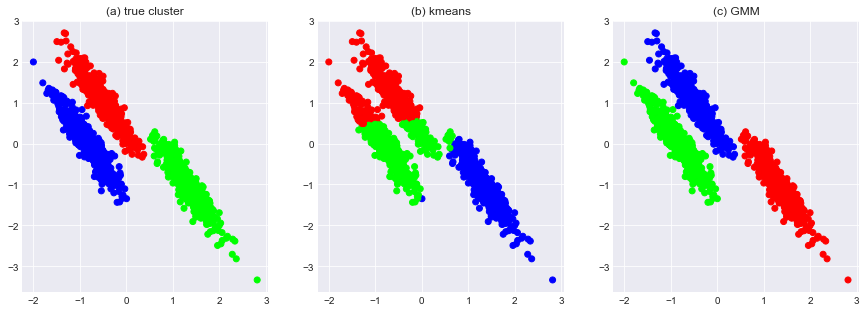

In [15]:
# 可視化
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title('(a) true cluster')
plt.scatter(X_norm[:,0],X_norm[:,1],c=y,cmap='brg')
plt.subplot(132)
plt.title('(b) kmeans')
plt.scatter(X_norm[:,0],X_norm[:,1],c=kmeans_y_pred,cmap='brg')
plt.subplot(133)
plt.title('(c) GMM')
plt.scatter(X_norm[:,0],X_norm[:,1],c=gmm_y_pred,cmap='brg')
plt.show()

# 新しい入力データが各クラスタに所属する確率

In [16]:
new_data = [[-0.5,0.3]]
probs = gmm.predict_proba(new_data)[0]

# 表示
for idx,prob in enumerate(probs):
    print(f'cluster{idx} probability:{prob:.3f}')

cluster0 probability:0.731
cluster1 probability:0.000
cluster2 probability:0.269
